# Chiffrement symétrique



## Chiffrement par bloc

On découpe les données en blocs de taille fixe. On va couper le message en blocs de données séparées. Plusieurs algorithmes de chiffrement : 

+ DES : inventé dans les années 70, n'est plus sûr aujourd'hui.
+ AES : inventé dans les années 2000, résultat d'un concours, le plus sûr et le plus utilisé aujourd'hui.

### ECB

Le mode le plus simple est le mode ECB (Electronic Code Block). Dans ce mode, les données sont séparés en blocs de la taille du bloc de chiffrement. 

Chaque bloc est ensuite chiffré et déchiffré indépendamment. 

Ce mode est vulnérable car des données identiques générent des données chiffrées identiques pour une même clé ; on peut ainsi repérer des motifs.


Une fois que l'image est dans une version décompressée avec 3 bytes par pixel (rouge, vert, bleu), il faut s'assurer que la taille totale soit un multiple de 16. Ceci est dû au chiffrement ECB, qui fonctionne en mode block de 16 bytes.

Maintenant on peut appliquer le chiffrement DES/ECB. DES indique ici le chiffrement de chaque block, tandis que ECB indique le mode d'opération.

Vous pouvez lancer ce premier block plusieurs fois et voir comment l'image est chaque fois chiffrée différemment. C'est normal, vu que ça dépend de la clé utilisée. Et celle-ci est initialisée d'une manière aléatoire.

### CBC
Dans le mode CBC (cipher block chaining), chaque bloc non chiffré subit une opération (le XOR) avec le bloc précédent chiffré avant d'être lui-même chiffré. Le premier bloc est un bloc d'initialisation pour que le message soit unique. 
Chaque bloc chiffré dépend que tous les autres blocs non chiffrés jusqu'à lui soient traités. 


### Les "modernes"

AEAD pour s'assurer de l'intégrité et de la confidentialité du message.


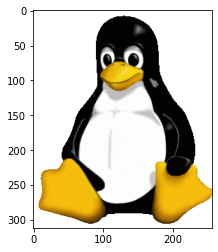

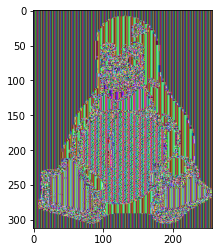

In [1]:
# import
from matplotlib.pyplot import figure, imshow
from Crypto.Cipher import AES, DES, ChaCha20
from Crypto.Random import get_random_bytes
import PIL.Image
import secrets

#autre mode MODE_ECB, MODE_CBC, MODE_CCM
def image_DES(img: bytes) -> PIL.Image:
    key = get_random_bytes(8)
    cipher = DES.new(key, DES.MODE_ECB)
    encrypted = cipher.encrypt(img)
    return PIL.Image.frombytes("RGB", (256, 312), encrypted)

image_tux = PIL.Image.open("./docs/tux.png").crop((0, 0, 256, 312))

imshow(image_tux)
figure()
imshow(image_DES(image_tux.tobytes()))

Le chiffrement DES est trop vieux, il ne faut plus l'utiliser. 

On va essayer avec AES. On va faire apparaître un pinguin DES/ECB suivi d'un pinguin AES/ECB.

Maintenant comparez les deux.

- Quelle est la plus grande différence? Et comment pouvez-vous l'expliquer?

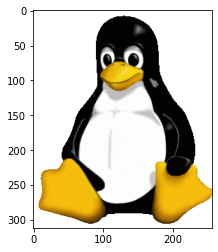

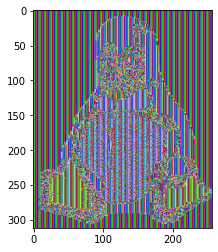

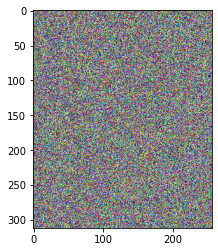

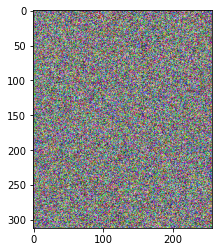

In [8]:
def image_DES(img: bytes) -> PIL.Image:
    key = get_random_bytes(8)
    cipher = DES.new(key, DES.MODE_ECB)
    encrypted = cipher.encrypt(img)
    return PIL.Image.frombytes("RGB", (256, 312), encrypted)

def image_AES(img: bytes) -> PIL.Image:
    key = get_random_bytes(16)
    cipher = AES.new(key, AES.MODE_CCM)
    encrypted = cipher.encrypt(img)
    return PIL.Image.frombytes("RGB", (256, 312), encrypted)

def image_ChaCha20(img: bytes) -> PIL.Image:
    key = get_random_bytes(32)
    cipher = ChaCha20.new(key=key)
    encrypted = cipher.encrypt(img)
    return PIL.Image.frombytes("RGB", (256, 312), encrypted)

image_tux = PIL.Image.open("./docs/tux.png").crop((0, 0, 256, 312))

imshow(image_tux)
figure()
imshow(image_DES(image_tux.tobytes()))
figure()
imshow(image_AES(image_tux.tobytes()))
figure()
imshow(image_ChaCha20(image_tux.tobytes()))